## Notebook to select the models that perform best

Model results of wind contribution to sea level rise are compared to observations using a multitaper spectral method and the Kolmogorov-Smirnov test (as in Dangendorf).

Models are selected that for all wind models have a resulting Euclidean distance from the spectral analysis of ...cm and a KS distance below ... 



In this notebook, functions are used from: 

'/code/figures.py' 

### Import necessary methods and data

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Comparison/code')

import model_selection as ms
import matplotlib.pyplot as plt

In [2]:
# Import detrended regression results
timeseries_20cr, timeseries_cmip6 = ms.import_data_model_selection()

Text(0.5, 1.0, 'Wind contribution to sea level height from 20CRv3 data')

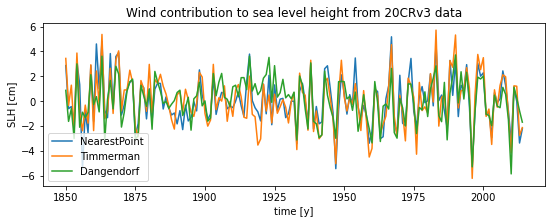

In [3]:
timeseries_20cr.plot(figsize=(9,3))
plt.ylabel('SLH [cm]')
plt.xlabel('time [y]')
plt.title('Wind contribution to sea level height from 20CRv3 data')

In [4]:
timeseries_cmip6['NearestPoint']

model,ACCESS-CM2,ACCESS-ESM1-5,BCC-CSM2-MR,BCC-ESM1,CAMS-CSM1-0,CAS-ESM2-0,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-ESM2-1,...,IPSL-CM6A-LR,MIROC-ES2L,MIROC6,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorCPM1,UKESM1-0-LL
time,,,,,,,,,,,,,,,,,,,,,
1850,0.461360,3.091780,-1.428988,0.920867,-1.397566,-0.172531,-3.019174,2.162972,-2.986307,-1.399766,...,1.097788,2.380438,-0.438536,-0.323026,-0.417324,0.190565,-0.158694,1.698219,-1.028515,-2.096063
1851,2.105911,2.014209,-0.204902,0.444870,1.259685,0.452904,0.067798,0.212688,-0.190658,-1.995680,...,1.164617,-1.081888,-0.125929,-0.545577,-0.274673,-1.644436,-1.822376,-3.865915,-0.902585,-0.345985
1852,3.364280,2.080809,1.072983,0.616240,-0.986685,-0.378604,0.834579,0.213753,-2.492379,-1.363879,...,0.776201,0.192826,-0.395084,1.083173,-1.914755,-1.622437,-0.582903,-3.425076,0.971267,3.269798
1853,-0.334634,3.079627,0.256735,-0.078821,0.033605,0.052037,-0.796105,1.565679,1.146745,-1.912387,...,0.989260,-0.183505,0.432688,-3.623972,-0.873330,0.873391,2.395859,-1.017724,-0.312489,-1.978705
1854,1.490235,0.775029,0.087802,2.320375,-1.188891,0.785685,-3.095844,1.874590,2.373313,1.495344,...,-1.043659,1.097474,0.445759,-4.138824,-0.743896,1.930450,-2.448711,-2.857152,0.601581,-1.014013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,-0.337639,0.817285,-0.076527,-1.586849,-0.187760,0.468743,-2.030530,1.640684,-1.251154,-0.474526,...,3.039567,0.259991,0.665111,-0.427162,-3.852981,-2.744438,-1.133930,0.775119,-1.429837,3.537614
2011,-0.655845,-0.791420,-0.751442,1.545658,-1.141534,0.259825,-0.115053,-1.070273,-0.096470,-1.265517,...,1.543003,-1.615191,-0.039053,-3.493673,0.105880,-4.320932,-1.273501,2.467414,1.393164,-0.509774
2012,1.262712,1.171685,-1.193054,-0.441058,0.915169,-0.434786,2.919553,1.485374,-2.362442,-2.075235,...,0.574167,0.567654,-0.356181,6.866040,0.259704,-3.973447,-2.005358,-1.716677,0.555077,-3.164206


### Multitaper spectral analysis

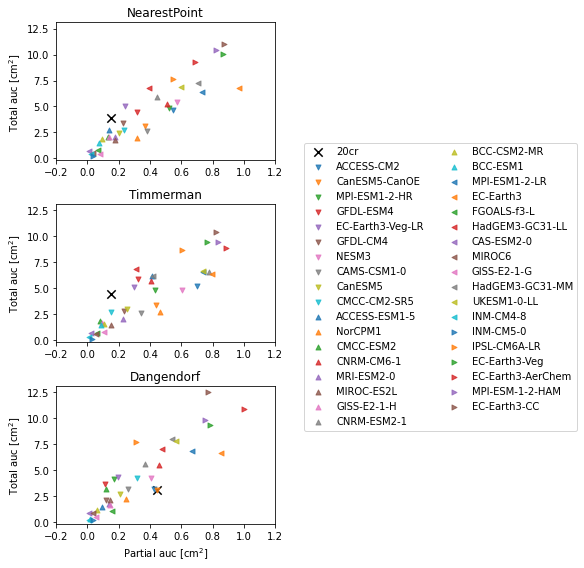

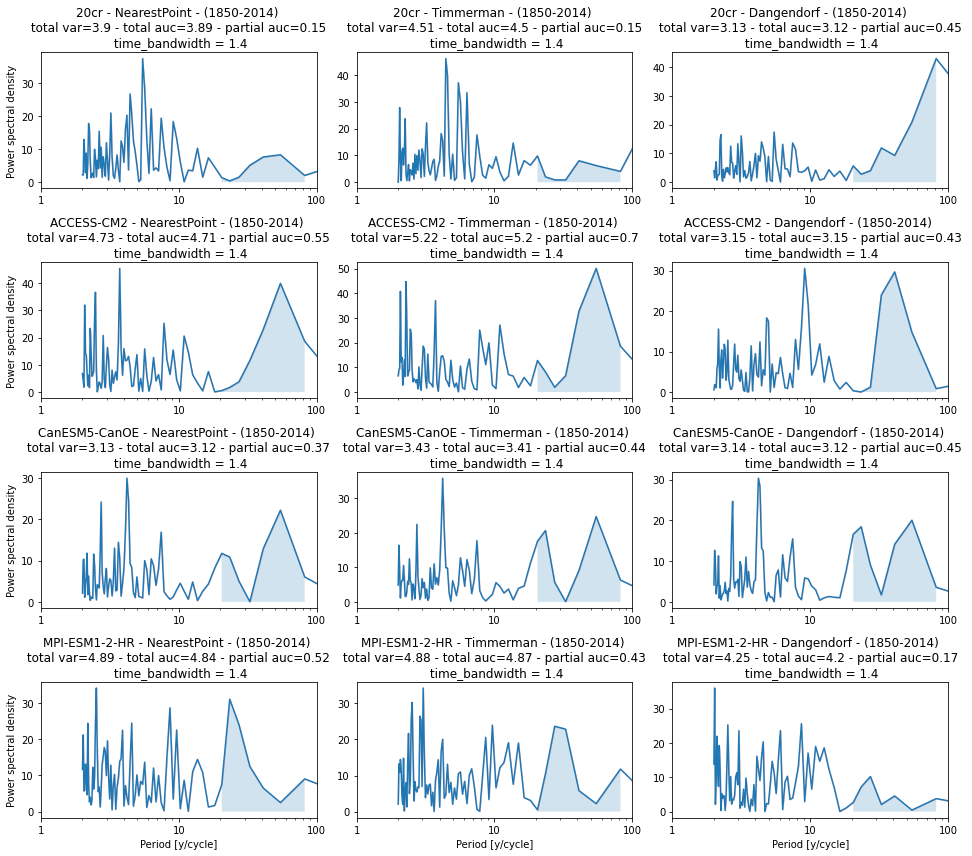

In [5]:
model_selection_spec = ms.plot_comp_20cr_cmip6(timeseries_20cr, timeseries_cmip6, n_cmip6 = 3)

In [6]:
model_selection_spec

,NearestPoint,Timmerman,Dangendorf,Average
model,,,,
ACCESS-CM2,0.905255,0.896248,0.038554,0.613353
CanESM5-CanOE,0.797149,1.121244,0.005959,0.641451
MPI-ESM1-2-HR,1.019647,0.46906,1.117663,0.868790
GFDL-ESM4,0.609308,1.426763,0.651099,0.895723
EC-Earth3-Veg-LR,1.168493,0.670211,1.246703,1.028469
GFDL-CM4,0.532565,1.649696,1.028409,1.070223
NESM3,1.638353,0.560719,1.102529,1.100534
CAMS-CSM1-0,1.236962,1.8657,0.203407,1.102023
CanESM5,1.419197,1.459069,0.483426,1.120564


### Kolmogorov Smirnov test


Answers the question: What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?


Quantifies a distance between the empirical distribution functions of two samples

Large distances between both cumulative distributions indicate inconsistencies between the observed and modeled data 

In [7]:
model_selection_ks = ms.ks_test_df(timeseries_20cr, timeseries_cmip6)

In [8]:
model_selection_ks

D$_{ks}$                                     p-value  \
                  NearestPoint Timmerman Dangendorf   Average NearestPoint   
model                                                                        
ACCESS-CM2            0.042424  0.078788   0.072727  0.064646     0.998505   
EC-Earth3-Veg-LR      0.084848  0.072727   0.109091  0.088889     0.593973   
ACCESS-ESM1-5         0.078788  0.072727   0.139394  0.096970       0.6867   
MPI-ESM1-2-HR          0.10303  0.072727   0.121212  0.098990     0.346029   
CAMS-CSM1-0           0.078788  0.151515    0.10303  0.111111       0.6867   
GFDL-ESM4             0.072727  0.115152   0.181818  0.123232     0.777094   
CanESM5-CanOE         0.121212  0.090909   0.163636  0.125253     0.177226   
CMCC-ESM2             0.115152  0.145455   0.133333  0.131313     0.224412   
EC-Earth3             0.163636  0.133333   0.121212  0.139394     0.023959   
IPSL-CM6A-LR          0.157576  0.115152   0.163636  0.145455     0.033094   
CMCC-CM2-SR5           0.09697  0.187879   0.163636  0.149495     0.420866   
NorCPM1               0.109091  0.127273   0.224242  0.153535     0.280527   
UKESM1-0-LL           0.157576  0.109091   0.193939  0.153535     0.033094   
CNRM-CM6-1            0.163636  0.139394   0.163636  0.155556     0.023959   
GFDL-CM4              0.151515  0.181818   0.145455  0.159596     0.045149   
HadGEM3-GC31-LL       0.157576  0.175758   0.151515  0.161616     0.033094   
EC-Earth3-AerChem     0.181818  0.139394   0.187879  0.169697     0.008437   
BCC-CSM2-MR           0.157576  0.157576        0.2  0.171717     0.033094   
CanESM5               0.145455  0.157576   0.212121  0.171717     0.060839   
EC-Earth3-Veg         0.212121  0.175758   0.169697  0.185859     0.001154   
EC-Earth3-CC          0.157576  0.133333   0.284848  0.191919     0.033094   
GISS-E2-1-H           0.151515  0.206061   0.218182  0.191919     0.045149   
MPI-ESM1-2-LR         0.212121  0.193939   0.169697  0.191919     0.001154   
NESM3                 0.212121  0.212121   0.175758  0.200000     0.001154   
MRI-ESM2-0            0.187879  0.206061   0.206061  0.200000     0.005811   
MIROC-ES2L            0.224242  0.266667   0.133333  0.208081     0.000476   
MPI-ESM-1-2-HAM       0.248485  0.206061   0.218182  0.224242      0.00007   
FGOALS-f3-L           0.187879   0.29697   0.212121  0.232323     0.005811   
BCC-ESM1              0.175758  0.181818   0.345455  0.234343     0.012098   
CNRM-ESM2-1           0.206061  0.224242   0.321212  0.250505     0.001761   
MIROC6                0.333333  0.315152   0.169697  0.272727          0.0   
GISS-E2-1-G            0.29697  0.266667   0.254545  0.272727     0.000001   
CAS-ESM2-0            0.315152  0.309091   0.212121  0.278788          0.0   
HadGEM3-GC31-MM       0.309091  0.290909   0.278788  0.292929          0.0   
INM-CM4-8             0.248485  0.321212   0.339394  0.303030      0.00007   
INM-CM5-0             0.387879       0.4   0.321212  0.369697          0.0   

                                                      
                  Timmerman Dangendorf       Average  
model                                                 
ACCESS-CM2           0.6867   0.777094  8.207664e-01  
EC-Earth3-Veg-LR   0.777094   0.280527  5.505315e-01  
ACCESS-ESM1-5      0.777094   0.080973  5.149221e-01  
MPI-ESM1-2-HR      0.777094   0.177226  4.334499e-01  
CAMS-CSM1-0        0.045149   0.346029  3.592928e-01  
GFDL-ESM4          0.224412   0.008437  3.366480e-01  
CanESM5-CanOE      0.504185   0.023959  2.351231e-01  
CMCC-ESM2          0.060839   0.106445  1.305654e-01  
EC-Earth3          0.106445   0.177226  1.025433e-01  
IPSL-CM6A-LR       0.224412   0.023959  9.382167e-02  
CMCC-CM2-SR5       0.005811   0.023959  1.502122e-01  
NorCPM1            0.138208   0.000476  1.397372e-01  
UKESM1-0-LL        0.280527   0.003953  1.058580e-01  
CNRM-CM6-1         0.080973   0.023959  4.296330e-02  
GFDL-CM4           0.008437   0.060839  3.81

### Model selection

Select models whereof all windmodels have a smaller euclidean distance than 2.5 and a smaller ks distance than 0.2

In [9]:
best_models = ms.select_models(model_selection_spec, model_selection_ks)

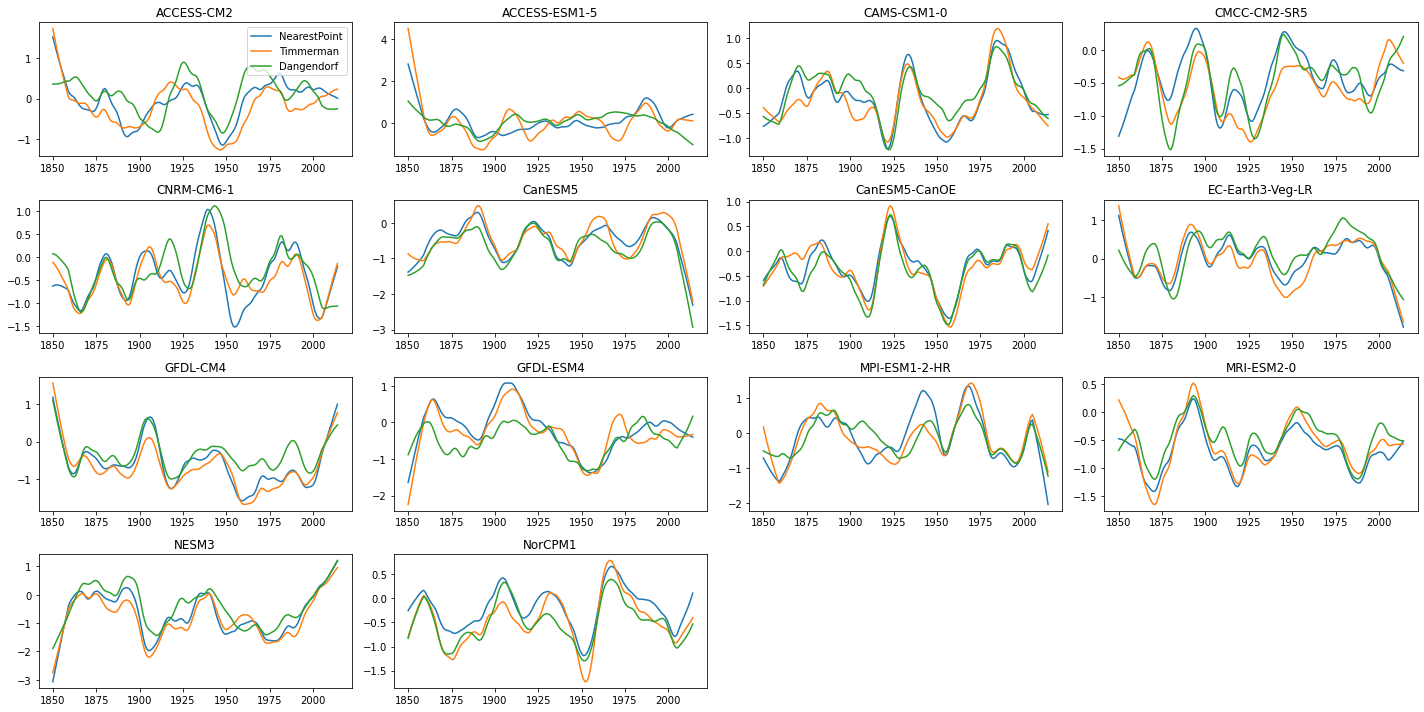

In [10]:
ms.plot_best_models(best_models, timeseries_cmip6)